# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.3.1 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240, 320, 3)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240, 320)

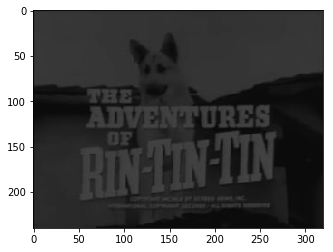

In [6]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

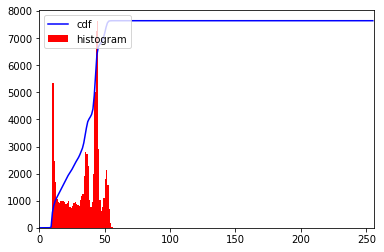

In [7]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [12]:
maximo = 0
minimo = 255
for i in rintin_gray:
    if i.min() < minimo:
        minimo = i.min()
    if i.max() > maximo:
        maximo = i.max()
    
print(minimo)
print(maximo)

8
58


In [13]:
def pixel(x):
    y = (255*(x-8))/50
    return y

for i in rintin_gray:
    for u in range(len(i)):
        i[u] = pixel(i[u])

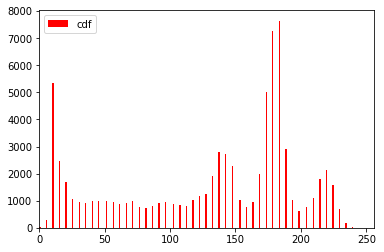

In [15]:
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

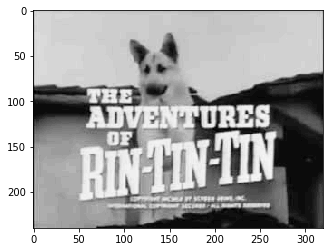

In [16]:
plt.imshow(rintin_gray, cmap = 'Greys_r', vmin = 0, vmax = 255)

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [144]:
img = cv2.imread("hall_box_battery1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

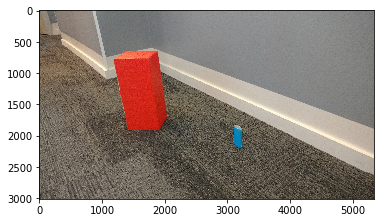

In [94]:
plt.imshow(img, cmap = 'Greys_r', vmin = 0, vmax = 255)

In [72]:
listared = []
listagreen = []
listablue = []
for lista in img:
    for item in lista:
        listared.append(item[0])
        listagreen.append(item[1])
        listablue.append(item[2])

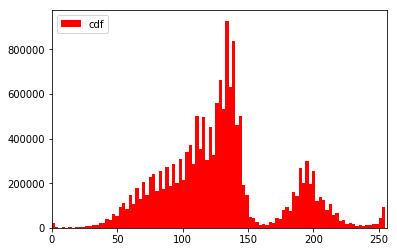

In [73]:
plt.hist(listared,bins = 100, color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

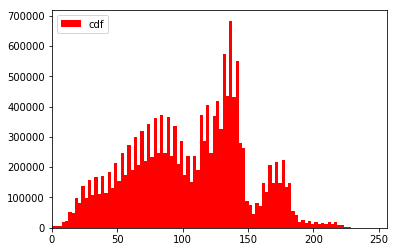

In [74]:
plt.hist(listablue, bins = 100, color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [147]:
for lista in img:
    for linha in lista:
        if linha[0] > 150 and linha[0] < 255 and linha[1] < 130 and linha[2] < 130:
            linha[0] = 255
            linha[1] = 255
            linha[2] = 255
        if linha[0] < 150 and linha[1] < 150 and linha[2] > 150 and linha[2] < 190:
            linha[0] = 255
            linha[1] = 255
            linha[2] = 255

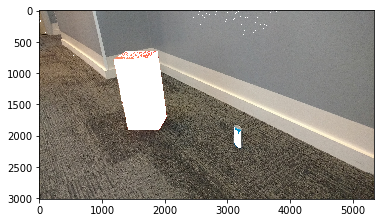

In [148]:
plt.imshow(img, cmap = 'Greys_r', vmin = 0, vmax = 255)